In [ ]:
%%capture
!pip install -q pyomo
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [ ]:
from pyomo.environ import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random
from random import randint
from random import uniform
import math
import random

# Question 1

In [ ]:
model1 = ConcreteModel()
model1.x = Var()

def question1 (m):
  return 2*m.x**4 - 4*m.x**3 + 1.5*m.x**2 + 0.8*m.x
model1.obj = Objective(rule = question1, sense = minimize)

#Solve
solver = SolverFactory('ipopt', executable='/content/ipopt')
solver.solve(model1, tee=True)

#Print solution
print('Solution')
print('x = ' , model1.x())
print('Objective = ', model1.obj())

Ipopt 3.12.13: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:        1
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Tot

In [ ]:
def function(x):
  return 2*(x**4) - 4*(x**3) + 1.5*(x**2) + 0.8*x

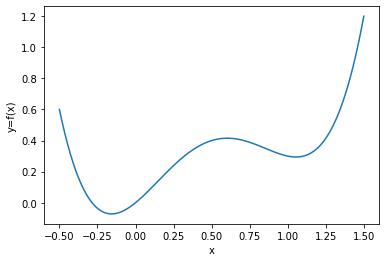

In [ ]:
#Get 1000 evenly spaced numbers between -0.5 and 1.5
x = np.linspace(-0.5,1.5,1000)

#Plot the curve
plt.plot(x, function(x))
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

# Question 2

In [ ]:
def function(x):
    return 2*(x**4) - 4*(x**3) + 1.5*(x**2) + 0.8*x

In [ ]:
def gradient(x):
    return 8*(x**3) - 12*(x**2) + 3*x + 0.8

In [ ]:
next_x = 0 #Choose a starting solution =  0
p = 0.0001 #Choose a precision value = 0.0001
gamma = 0.005 #Choose Learning rate gamma (𝛄) = 0.005 
max_iters = 1000

In [ ]:
for i in range(max_iters):
    current_x = next_x
    next_x = current_x - gamma * gradient(current_x)
    step = function(next_x) - function(current_x)
    if abs(step) <= p:
        break

print('Minimum at:', next_x)
print("Minimum function value:", function(next_x) )

Minimum at -0.13838580640885864
Minimum function value -0.07064850235006997


Global minima x = -0.1383
Minimum function value = -0.07

Based on the graph provided in Question 1, the new global minima point of -0.1383 is accurate. 

# Question 3

In [ ]:
seed(1)

In [ ]:
def function(x):
    return 2*(x**4) - 4*(x**3) + 1.5*(x**2) + 0.8*x

In [ ]:
def feasible(x):
    if x >= -0.5:
        return True
    else:
        return False

In [ ]:
current_temp = 10000
final_temp = 1
iteration_count = 1000
cooling_rate = 0.99
number_of_variables = 1
current_solution = randint(5, 10)

In [ ]:
solutions = []
temp = []

while final_temp<current_temp:
    
    for i in range(iteration_count):
        
        solution = []
        
        #print('current_solution', current_solution)
        #print('fitness_current', fitness_current)
        #print('\n')
        
        fitness_current = function(current_solution)
        next_solution = current_solution - uniform(-1, 1)/10
        fitness_next = function(next_solution)

        
        
        if (feasible(next_solution)) & (feasible(current_solution)) :
         
            if fitness_next < fitness_current:
                current_solution = next_solution



            else:
                delta = fitness_next - fitness_current
                prob_accept = math.exp(-delta/current_temp)

                if prob_accept>random.random():
                    current_solution = next_solution

            print(current_solution)
            solution.append(function(current_solution))
                
    try:
        solutions.append(sum(solution)/len(solution))
        temp.append(current_temp)
    except:
        pass

    current_temp = current_temp*cooling_rate

Streaming output truncated to the last 5000 lines.
-0.3671981632119626
-0.2940533531334951
-0.2345521108338829
-0.179782212411812
-0.27054626293602624
-0.1886968102102789
-0.09635012330090006
-0.12401111873879578
-0.07594275471111375
-0.0060419946800637225
0.09243891206281855
0.029061713222910582
0.06882870255077062
-0.025487540768389855
-0.017283479855641243
-0.11529886969093811
-0.029394217310809323
-0.11246042248601605
-0.15038167936767083
-0.052997984947613264
-0.1501785157609298
-0.14079702676248526
-0.11239275955769987
-0.06129100964269351
-0.14024879082309563
-0.1452971540057408
-0.06698533257480989
-0.06698533257480989
-0.08309597440574895
-0.005400920542490209
0.08059362900216478
0.04226583024979822
0.027041109953298694
-0.05989584167273436
-0.0010519809448788775
0.08663207760990013
0.17419130169397445
0.26165653189914034
0.18794515760245625
0.18806347741257826
0.17872784080399526
0.17435281156844948
0.13474434589821835
0.08774269681739086
0.18707267845006548
0.109618781062675

In [ ]:
#Printing Results
print ('Minimum x:', current_solution)
print ('Minimum objective:',fitness_current)

Minimum x: -0.14665583275831712
Minimum objective: -0.05903623315950305


Question 2 gave Minimum x = -0.138 with an objective function of -0.0706.

Question 3 gave Minimum x = -0.146 with an objective function of -0.059.

The answers do not match because of the nature of the Simulated Annealing mathematical composition. This type of algorithm is best used for larger, complex problems to find a very good, but general local minima point under the "constraint" of a predetermined iteration count which influences the answer.